# Tutorial 2:

## Multiple Linear Regression
In this section, we will learn some of the key concepts in Multiple Linear Regression, and also understand some of the assumptions in linear regression.

Multivariate Linear Regression is used for predicting a continuous value target/dependent variable. While using the multiple variables we must understand the relationship among the variables and their correlation with the target variable.
![Multiple Linear Regression](images/MLR_formula.png "Multiple Linear Regression")

As discussed in Linear Regression, Correlation doesn’t mean Causation understanding the following concepts will help us dive deeper in understanding the prerequisites for modeling data using Multivariate Regression.
#### Assumptions in Linear Regression
Linear regression works based on some assumption which must be understood before we start using them.

- The relationship between the independent and dependent variables must be linear.
- All the variables are normally distributed.
- No multicollinearity between the Independent variables.
- The residuals must not be autocorrelated and heteroscedastic. 
  
***The above assumptions must be checked once we decide to use the linear regression model***
#### Multicollinearity
Multicollinearity is the most important concept in multivariate Linear Regression. It occurs due to the high correlation among independent variables.

***There are various techniques to avoid multicollinearity. Some of them are as follows.***

- Drop one of the independent variables among the correlated variables.
- Variation Inflation Factor (VIF) can be used to check the multicollinearity.
- Removing the mean of variables to center the data, also helps.
  
#### Homoscedasticity / Heteroscedasticity
Understanding the errors of the model is important to build a robust machine learning model. In Linear Regression the Error(Residuals) are homoscedastic meaning residuals are of similar magnitude. Also, we say normally distributed error.
The below figure depicts heteroscedasticity. We can see the variation in the Residuals(errors) across the fitted line.
![Homoscedasticity](images/Homoscedasticity.jfif "Homoscedasticity")


### We will perform the following steps to build a Multiple Linear Regression model using the popular Beer dataset.

 
 
  - **Data Preprocessing**

    - Importing the libraries.
    - Importing dataset.
    - Dealing with the categorical variable.
    - Classifying dependent and independent variables.
    - Splitting the data into a training set and test set.
    - Feature scaling.
 

  -  **Linear Regression**

    - Create a Linear Regressor.
    - Feed the training data to the regressor model.
    - Predicting the scores for the test set.
    - Using the RMSE to measure the performance.

In [2]:
#1 Importing necessary libraries
import numpy as np
import pandas as pd

In [4]:
#2 Importing the data set
dataset = pd.read_csv('Datasets/beer_data.csv')

#Printing first 10 rows of the dataset
dataset.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [18]:
# Dealing with Categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Making sure the type of the review_profilename column is str
dataset["review_profilename"] = dataset["review_profilename"].astype(str)
dataset["review_profilename"] = le.fit_transform(dataset["review_profilename"])
dataset.head()

,beer_beerid,review_profilename,review_overall
0,48215,2026,3.0
1,52159,21705,3.0
2,52159,13305,3.0
3,52159,218,4.0
4,52159,10079,3.5


In [21]:
#Printing the summary of the dataset
dataset.describe()

,beer_beerid,review_profilename,review_overall
count,475984.000000,475984.000000,475984.000000
mean,21660.550611,11140.567574,3.814827
std,21793.437326,6384.102903,0.720411
min,3.000000,0.000000,0.000000
25%,1716.000000,5686.000000,3.500000
50%,13892.000000,11196.000000,4.000000
75%,39397.000000,16481.000000,4.500000
max,77317.000000,22497.000000,5.000000


[Text(0.5, 0, 'beer_beerid'),
 Text(1.5, 0, 'review_profilename'),
 Text(2.5, 0, 'review_overall')]

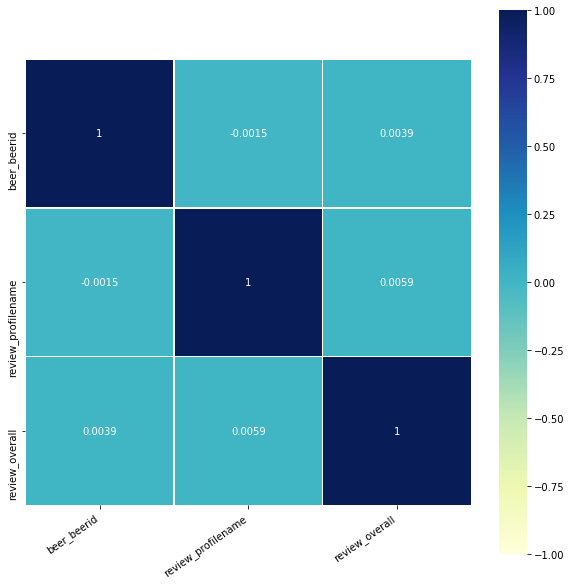

In [22]:
#A simple correlation plot usong seaborn. The below plot shows how the different variables correlate with each other
import seaborn as sns
import matplotlib.pyplot as plt
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True,
    linewidths=.5,
    cmap="YlGnBu" )
#Rotating labels on x axis
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=35,
    horizontalalignment='right'
)

In [23]:
#4 Classifying dependent and independent variables

#All columns except the last column are independent features- (Selecting every column except Score)
X = dataset.iloc[:,:-1].values

#Only the last column is the dependent feature or the target variable(Score)
y = dataset.iloc[:,-1].values

In [24]:
#5 Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#################Data Preprocessing Ends #################################

In [26]:
print("\n\nTraining Set :\n----------------\n")
print("X = \n", X_train)
print("y = \n", y_train)
print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test)
print("y = \n", y_test)



Training Set :
----------------

X = 
 [[ 2512 12620]
 [60420 15452]
 [ 1443   501]
 ...
 [  295  5492]
 [ 1192 10164]
 [73828 15376]]
y = 
 [4.5 3.5 4.5 ... 3.5 4.  4. ]


Test Set :
----------------

X = 
 [[ 9873 10410]
 [42466 19693]
 [ 1119  7364]
 ...
 [   30 10014]
 [35732 20141]
 [ 1213  3412]]
y = 
 [3.  3.5 2.5 ... 4.  5.  4.5]


In [27]:
""" Multiple Linear regression """

#6 Creating the Regressor and training it with the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize = True)

In [28]:
#7 Feeding the data and training the model
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
#8 Predicting the Score for test set observations
y_pred = regressor.predict(X_test)

In [30]:
#printing the predictions
print("\n----------------------------\nPredictions = \n",y_pred)


----------------------------
Predictions = 
 [3.8126945  3.82366812 3.80932592 ... 3.81121519 3.82320395 3.80632537]


In [34]:
#8 Claculating the Accuracy of the predictions
from sklearn import metrics
print("Prediction Accuracy = ", 1-metrics.r2_score(y_test, y_pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred,
                         "Abs. Error" : np.abs(y_test - y_pred)})

error_df

Prediction Accuracy =  0.9999870326043429

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted,Abs. Error
0,3.0,3.812695,0.812695
1,3.5,3.823668,0.323668
2,2.5,3.809326,1.309326
3,2.5,3.822978,1.322978
4,5.0,3.823842,1.176158
...,...,...,...
95192,3.0,3.815191,0.815191
95193,3.5,3.812933,0.312933
95194,4.0,3.811215,0.188785
95195,5.0,3.823204,1.176796


In [31]:
#9 Calculating score from Root Mean Log Squared Error

def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return error, score

error, score = rmlse(y_test, y_pred)

print("\n",'-'*40)
print("RMLSE : ", error)
print("Score : ", score)


 ----------------------------------------
RMLSE :  0.07408909414135943
Score :  0.9259109058586406
